# Read the MNIST dataset and generate the new dataset

In [2]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt

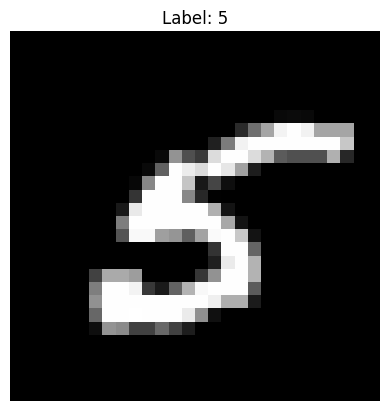

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the MNIST dataset with digit classification
class MNISTByDigitDataset(Dataset):
    def __init__(self, root, transform=None):
        # Load MNIST dataset
        self.mnist = datasets.MNIST(root, train=True, download=True)
        self.transform = transform
        
        # Group images by their digit labels (0-9)
        self.digit_data = {i: [] for i in range(10)}
        
        # Sort images into the digit groups
        for img, label in self.mnist:
            self.digit_data[label].append(img)
        
    def __len__(self):
        return sum(len(images) for images in self.digit_data.values())
    
    def __getitem__(self, idx):
        # Get a random digit label (0-9)
        random_digit = random.choice(list(self.digit_data.keys()))
        
        # Get a random image from the selected digit group
        random_image = random.choice(self.digit_data[random_digit])
        
        # Apply any transformation (if specified)
        if self.transform:
            random_image = self.transform(random_image)
        
        return random_image, random_digit

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNISTByDigitDataset(root='../../../../mnt/sdc/zhongqirui/MNIST', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Display a random image from the dataset
def show_random_image(loader):
    # Get a random batch of data
    image, label = next(iter(loader))
    
    # Convert the tensor to numpy and denormalize
    image = image.squeeze().numpy() * 0.5 + 0.5  # Denormalize the image

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label.item()}")
    plt.axis('off')
    plt.show()

# Display a random image
show_random_image(train_loader)

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Define the AdditionDataset class
class AdditionDataset(Dataset):
    def __init__(self, root, transform=None):
        # Load MNIST dataset
        self.mnist = datasets.MNIST(root, train=True, download=True, transform=None)  # No transform here
        self.transform = transform
        self.digits = [i for i in range(5)]  # Only using digits 0 to 4
        
        # Group images by their digit labels (0-9)
        self.digit_data = {i: [] for i in range(10)}
        for img, label in self.mnist:
            self.digit_data[label].append(img)  # Store images by digit label
        
    def __len__(self):
        return 10000  # Arbitrary large value to generate enough examples
    
    def __getitem__(self, idx):
        # Randomly choose two numbers between 0 to 4
        digit1, digit2 = random.sample(self.digits, 2)
        
        # Get the corresponding images for the chosen digits
        image1 = self.get_image_by_digit(digit1)
        image2 = self.get_image_by_digit(digit2)
        
        # Concatenate the two images horizontally (side by side)
        combined_image = self.concatenate_images(image1, image2)
        
        # Calculate the sum of the two digits
        sum_value = digit1 + digit2
        
        # Generate the sum image (the label image)
        sum_image = self.get_image_by_digit(sum_value)
        
        # Apply transformations if any
        if self.transform:
            combined_image = self.transform(combined_image)
            sum_image = self.transform(sum_image)
        
        return combined_image, sum_image
    
    def get_image_by_digit(self, digit):
        # Get a random image for the given digit from the digit_data
        return random.choice(self.digit_data[digit])
    
    def concatenate_images(self, image1, image2):
        # Ensure images are PIL format before concatenation
        if isinstance(image1, Image.Image) and isinstance(image2, Image.Image):
            # Create a blank canvas large enough to fit both images side by side
            width = image1.width + image2.width
            height = max(image1.height, image2.height)
        
            combined_image = Image.new("L", (width, height))
            combined_image.paste(image1, (0, 0))
            combined_image.paste(image2, (image1.width, 0))
        
            return combined_image
        else:
            raise ValueError("Images should be in PIL format.")


# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = AdditionDataset(root='../../../../mnt/sdc/zhongqirui/MNIST', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Display a random batch from the dataset
def show_random_image(loader):
    # Get a random batch of data
    image, label = next(iter(loader))
    
    # Convert the image tensor to numpy and denormalize
    image = image.squeeze().numpy() * 0.5 + 0.5  # Denormalize the image

    # Convert label tensor to numpy and denormalize
    label_image = label.squeeze().numpy() * 0.5 + 0.5  # Denormalize the label image
    
    # Display the concatenated image and label image
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap='gray')
    # axes[0].set_title("Combined Image")
    axes[0].axis('off')

    axes[1].imshow(label_image, cmap='gray')
    # axes[1].set_title(f"Label Image (Sum)")
    axes[1].axis('off')
    
    plt.show()

# Display a random image
show_random_image(train_loader)

Failed to download (trying next):
HTTP Error 404: Not Found



  2%|▏         | 196608/9912422 [00:03<02:30, 64585.33it/s]


KeyboardInterrupt: 

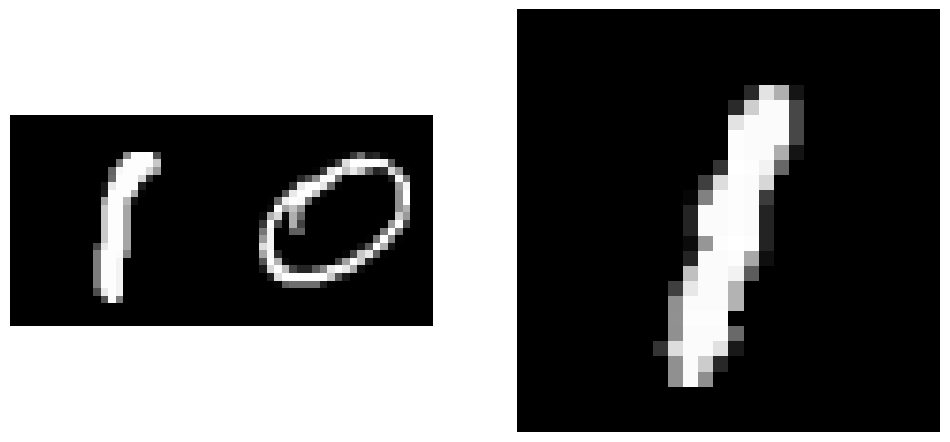

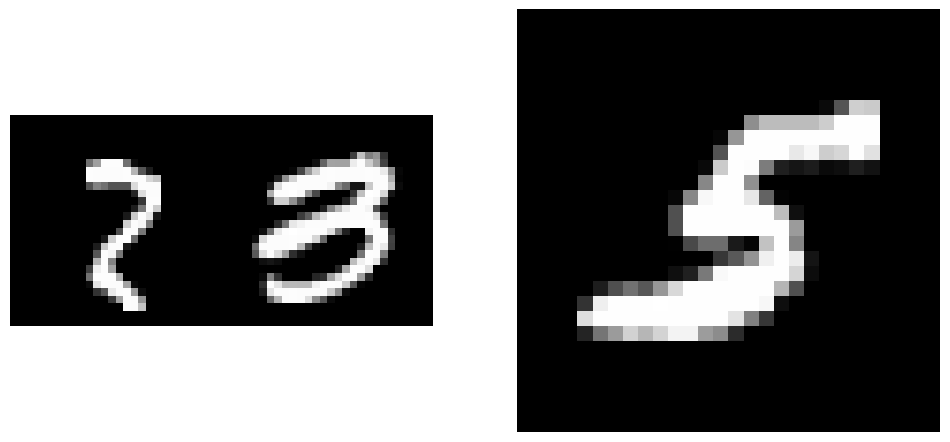

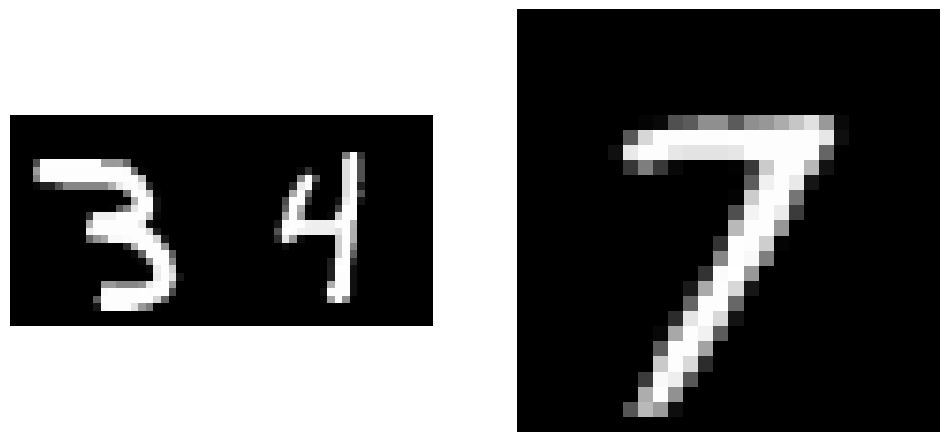

In [41]:
show_random_image(train_loader)
show_random_image(train_loader)
show_random_image(train_loader)

## 数据集生产

Dataset saved to ../../../../mnt/sdc/zhongqirui/static_MNIST


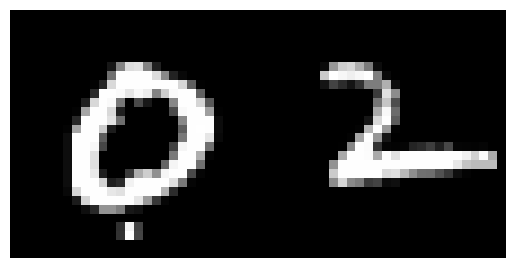

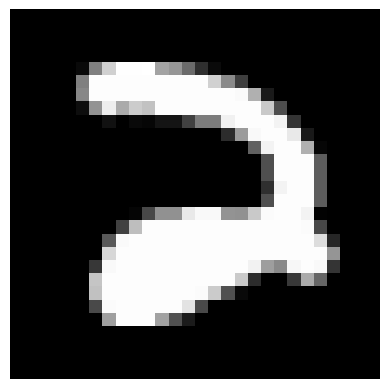

In [10]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Define the AdditionDataset class
class AdditionDataset(Dataset):
    def __init__(self, root, transform=None, num_samples=10000):
        # Load MNIST dataset
        self.mnist = datasets.MNIST(root, train=True, download=True, transform=None)  # No transform here
        self.transform = transform
        self.digits = [i for i in range(5)]  # Only using digits 0 to 4
        self.num_samples = num_samples
        
        # Group images by their digit labels (0-9)
        self.digit_data = {i: [] for i in range(10)}
        for img, label in self.mnist:
            self.digit_data[label].append(img)  # Store images by digit label
        
    def __len__(self):
        return self.num_samples  # Generate enough examples
    
    def __getitem__(self, idx):
        # Randomly choose two numbers between 0 to 4
        digit1, digit2 = random.sample(self.digits, 2)
        
        # Get the corresponding images for the chosen digits
        image1 = self.get_image_by_digit(digit1)
        image2 = self.get_image_by_digit(digit2)
        
        # Concatenate the two images horizontally (side by side)
        combined_image = self.concatenate_images(image1, image2)
        
        # Calculate the sum of the two digits
        sum_value = digit1 + digit2
        sum_image = self.get_image_by_digit(sum_value)
        
        # Apply transformations if any
        if self.transform:
            combined_image = self.transform(combined_image)
            sum_image = self.transform(sum_image)
        
        # Return the combined image and the sum value (as a label)
        return combined_image, sum_image
    
    def get_image_by_digit(self, digit):
        # Get a random image for the given digit from the digit_data
        return random.choice(self.digit_data[digit])
    
    def concatenate_images(self, image1, image2):
        # Ensure images are PIL format before concatenation
        if isinstance(image1, Image.Image) and isinstance(image2, Image.Image):
            # Create a blank canvas large enough to fit both images side by side
            width = image1.width + image2.width
            height = max(image1.height, image2.height)
        
            combined_image = Image.new("L", (width, height))
            combined_image.paste(image1, (0, 0))
            combined_image.paste(image2, (image1.width, 0))
        
            return combined_image
        else:
            raise ValueError("Images should be in PIL format.")

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image
])

# Create dataset
train_dataset = AdditionDataset(root='../../../../mnt/sdc/zhongqirui/MNIST', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Function to generate and save dataset
def save_dataset(loader, num_samples=100, output_dir='./generated_data'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    images = []
    labels = []
    
    for i, (image, label) in enumerate(loader):
        images.append(image.squeeze().numpy())  # Remove batch dimension and convert to numpy
        labels.append(label.squeeze().numpy())  # Convert label to scalar
        
        if i >= num_samples - 1:
            break
    
    # Convert list to numpy arrays and save to disk
    images = np.array(images)
    labels = np.array(labels)
    
    np.save(os.path.join(output_dir, 'images.npy'), images)
    np.save(os.path.join(output_dir, 'labels.npy'), labels)
    
    print(f"Dataset saved to {output_dir}")

# Save the dataset
save_dataset(train_loader, num_samples=4_000_000, output_dir='../../../../mnt/sdc/zhongqirui/static_MNIST')

# Function to display images without title
def show_random_image(loader):
    # Get a random batch of data
    image, label = next(iter(loader))
    
    # Convert the image tensor to numpy and denormalize
    image = image.squeeze().numpy() * 0.5 + 0.5  # Denormalize the image
    label = label.squeeze().numpy() * 0.5 + 0.5  # Denormalize the image
    
    # Display the concatenated image (no title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

    plt.imshow(label, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

# Display a random image without title
show_random_image(train_loader)

## verify 测试结果

In [3]:
import torch.nn as nn
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'    # 把 '1' 换成你要用的 GPU 编号

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.fc1   = nn.Linear(64 * 7 * 7, 128)
        self.fc2   = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # 28→14
        x = self.pool(F.relu(self.conv2(x)))   # 14→7
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

root = '../../../../mnt/sdc/zhongqirui/MNIST'
full_ds = datasets.MNIST(root, train=True, download=True, transform=transform)

torch.manual_seed(42)
train_len = int(len(full_ds) * 0.8)
val_len   = len(full_ds) - train_len
train_ds, val_ds = torch.utils.data.random_split(full_ds, [train_len, val_len])

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True,  drop_last=True)
val_loader   = DataLoader(val_ds,   batch_size=64, shuffle=False)

In [5]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm import tqdm
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'    # 把 '1' 换成你要用的 GPU 编号
# ---------- 实例化 ----------
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ---------- 训练 + 验证 ----------
def fit(model, train_ld, val_ld, epochs=20):
    best = 0.0
    for ep in range(1, epochs+1):

        # ---- train ----
        # ------------ train loop 改动 ------------
        model.train()
        running = 0.0
        pbar = tqdm(train_ld, desc=f'Epoch {ep}/{epochs}', ncols=100)

        for i, (imgs, lbls) in enumerate(pbar, 1):   # ← 从 1 开始计数
            imgs, lbls = imgs.to(device), lbls.to(device)
            optimizer.zero_grad()
            loss = criterion(model(imgs), lbls)
            loss.backward(); optimizer.step()

            running += loss.item()
            pbar.set_postfix(train_loss=f'{running / i:.4f}')   # 用 i 做分母

        # ---- validate ----
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for imgs, lbls in val_ld:
                imgs, lbls = imgs.to(device), lbls.to(device)
                pred = model(imgs).argmax(1)
                total   += lbls.size(0)
                correct += (pred == lbls).sum().item()
        acc = 100 * correct / total
        print(f'  ↳ val_acc = {acc:.2f}%')

        # ---- save best ----
        if acc > best:
            best = acc
            os.makedirs('weight', exist_ok=True)
            torch.save(model.state_dict(), 'weight/MNIST_best.pth')
            print('  ✅ new best model saved')

    print(f'Finished. Best Val Acc = {best:.2f}%')

fit(model, train_loader, val_loader, epochs=5)

Epoch 1/5:   0%|                                                            | 0/750 [00:00<?, ?it/s]

Epoch 1/5: 100%|███████████████████████████████| 750/750 [00:12<00:00, 58.35it/s, train_loss=0.1955]


  ↳ val_acc = 98.07%
  ✅ new best model saved


Epoch 2/5: 100%|███████████████████████████████| 750/750 [00:10<00:00, 71.22it/s, train_loss=0.0492]


  ↳ val_acc = 98.58%
  ✅ new best model saved


Epoch 3/5: 100%|███████████████████████████████| 750/750 [00:09<00:00, 78.13it/s, train_loss=0.0348]


  ↳ val_acc = 98.48%


Epoch 4/5: 100%|███████████████████████████████| 750/750 [00:09<00:00, 78.09it/s, train_loss=0.0249]


  ↳ val_acc = 98.89%
  ✅ new best model saved


Epoch 5/5: 100%|███████████████████████████████| 750/750 [00:10<00:00, 72.47it/s, train_loss=0.0179]


  ↳ val_acc = 98.72%
Finished. Best Val Acc = 98.89%


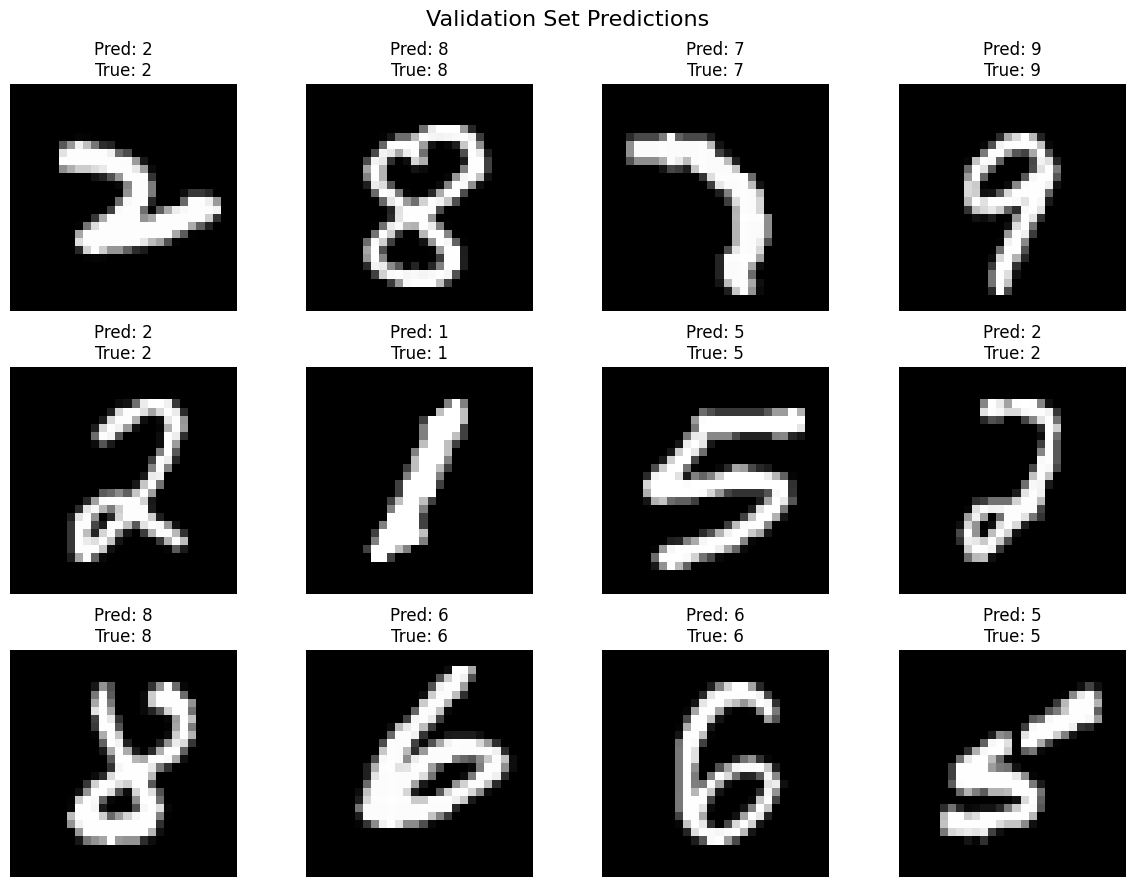

/tmp/ipykernel_2981598/3558431292.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('weight/MNIST_best.pth'))


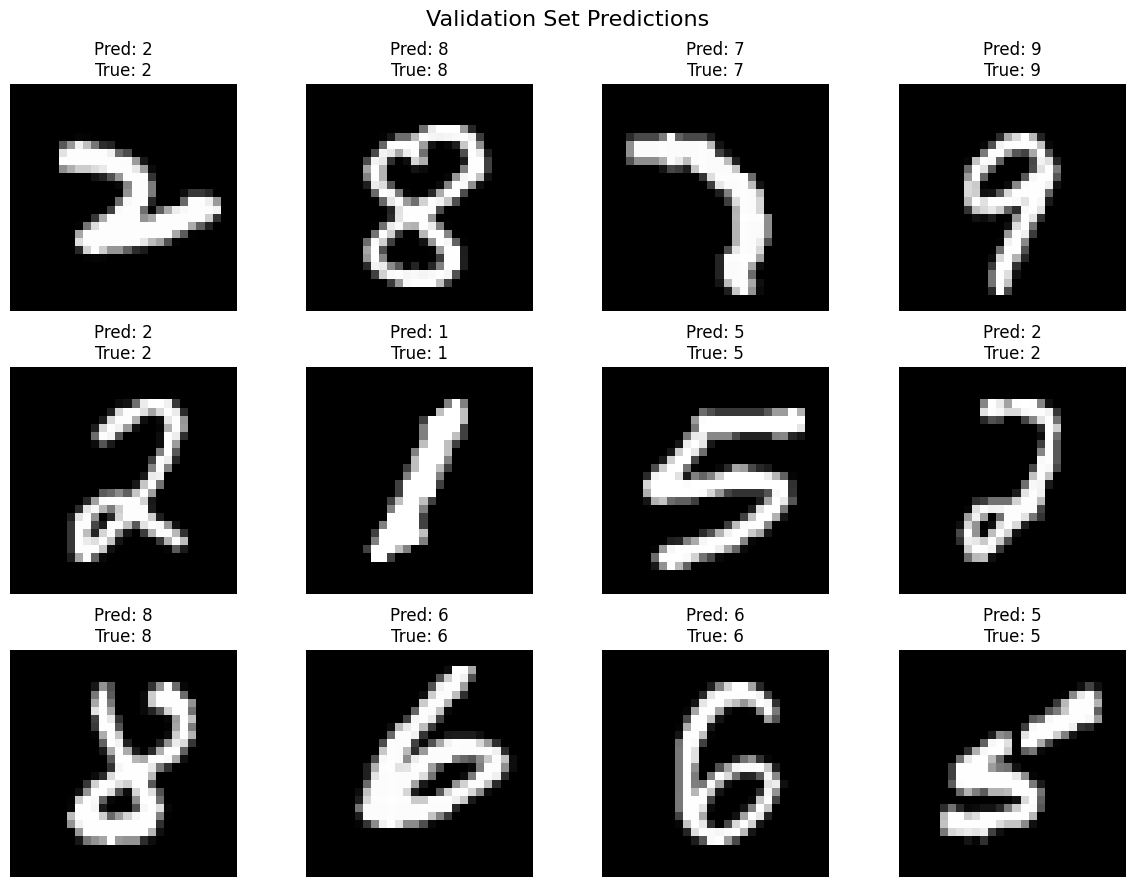

In [6]:
def visualize_predictions(model, val_loader, device, num_samples=12):
    model.eval()
    images, labels = next(iter(val_loader))
    images, labels = images.to(device), labels.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
    
    # 反归一化图像以便显示
    images = images.cpu().numpy()
    images = images * 0.5 + 0.5  # 从[-1,1]反归一化到[0,1]
    
    # 创建子图
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
    fig.suptitle('Validation Set Predictions', fontsize=16)
    
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            ax.imshow(images[i][0], cmap='gray')
            ax.set_title(f'Pred: {preds[i].item()}\nTrue: {labels[i].item()}')
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# 训练完成后调用可视化函数
visualize_predictions(model, val_loader, device)

# 或者加载已保存的最佳模型进行可视化
best_model = SimpleCNN().to(device)
best_model.load_state_dict(torch.load('weight/MNIST_best.pth'))
visualize_predictions(best_model, val_loader, device)

## 测试MNIST加法结果

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
import os
import torch.nn.functional as F
from typing import Tuple
import time
from tqdm import tqdm
import lpips
from torch.amp import GradScaler, autocast
import csv
import argparse


class AdditionDataset(Dataset):
    def __init__(self, img_npy, lab_npy, transform=None):
        self.images  = np.load(img_npy).astype(np.uint8)   # ensure uint8
        self.labels  = np.load(lab_npy).astype(np.uint8)
        self.t = transform

    def __len__(self): return len(self.images)

    def __getitem__(self, idx):
        img  = Image.fromarray(self.images[idx],  mode='L')
        lab  = Image.fromarray(self.labels[idx], mode='L')
        if self.t:
            img = self.t(img)
            lab = self.t(lab)
        return img, lab
    
tf = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
    
data_set = AdditionDataset(img_npy='../../../../mnt/sdc/zhongqirui/static_MNIST/images.npy',
        lab_npy='../../../../mnt/sdc/zhongqirui/static_MNIST/labels.npy',
        transform=transform)

data_loader = DataLoader(data_set, batch_size=16, shuffle=True)

### 模型部分

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.fc1   = nn.Linear(64 * 7 * 7, 128)
        self.fc2   = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # 28→14
        x = self.pool(F.relu(self.conv2(x)))   # 14→7
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings: int, embedding_dim: int,
                 commitment_cost: float = 0.25):
        super().__init__()
        self.D = embedding_dim
        self.K = num_embeddings
        self.beta = commitment_cost

        self.embeddings = nn.Embedding(self.K, self.D)
        self.embeddings.weight.data.uniform_(-1 / self.K, 1 / self.K)

    def forward(self, z_e: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        # z_e: [B, D, H, W]  (这里 H=7, W=14)
        B, D, H, W = z_e.shape
        z_e_flat = z_e.permute(0, 2, 3, 1).reshape(-1, D)  # [BHW, D]

        # L2 距离
        dist = (z_e_flat.pow(2).sum(1, keepdim=True)
               -2 * z_e_flat @ self.embeddings.weight.t()
               + self.embeddings.weight.pow(2).sum(1))

        idx = dist.argmin(1)                               # 最近邻索引
        z_q = self.embeddings(idx).view(B, H, W, D).permute(0, 3, 1, 2)

        # VQ‑Loss
        loss_codebook  = F.mse_loss(z_q.detach(), z_e)
        loss_commit    = F.mse_loss(z_q, z_e.detach())
        vq_loss = loss_commit + self.beta * loss_codebook

        # Straight‑Through
        z_q = z_e + (z_q - z_e).detach()
        return z_q, vq_loss
    
class TokenTransformerLite(nn.Module):
    """
    输入  [B,D,7,14]  → 98 token
    输出  [B,D,7,14]（同分辨率）
    仅做轻量增强：层数 6、Pre‑Norm、FeedForward×6、Dropout0.1
    """
    def __init__(self,
                 emb_dim:      int = 64,
                 num_layers:   int = 6,     # ← 4→6
                 n_head:       int = 8,
                 use_sin_pe:   bool = False):
        super().__init__()
        self.h, self.w  = 7, 14
        self.seq_len    = self.h * self.w     # 98

        if use_sin_pe:
            # 固定正弦 PE：不训练、无额外参数
            pe = self.build_sinusoid_pe(self.seq_len, emb_dim)
            self.register_buffer('pe', pe, persistent=False)
            self.learnable_pos = None
        else:
            self.learnable_pos = nn.Parameter(torch.randn(1, self.seq_len, emb_dim))

        enc_layer = nn.TransformerEncoderLayer(
            d_model=emb_dim,
            nhead=n_head,
            batch_first=True,
            dim_feedforward=emb_dim * 6,     # 4× → 6×
            dropout=0.1,
            norm_first=True                  # Pre‑Norm
        )
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers)
        self.norm = nn.LayerNorm(emb_dim)

    @staticmethod
    def build_sinusoid_pe(seq_len, dim):
        pos = torch.arange(seq_len)[:, None]
        i   = torch.arange(dim)[None, :]
        angle = pos / torch.pow(10000, (2*(i//2)) / dim)
        pe   = torch.zeros(seq_len, dim)
        pe[:, 0::2] = torch.sin(angle[:, 0::2])
        pe[:, 1::2] = torch.cos(angle[:, 1::2])
        return pe.unsqueeze(0)   # [1,seq,dim]

    def forward(self, z_q):                     # z_q [B,D,7,14]
        B, D, H, W = z_q.shape
        x = z_q.flatten(2).permute(0, 2, 1)     # [B,98,D]

        if self.learnable_pos is not None:
            x = x + self.learnable_pos
        else:
            x = x + self.pe.to(x.dtype)

        x = self.encoder(x)
        x = self.norm(x)                        # [B,98,D]
        x = x.permute(0, 2, 1).view(B, D, H, W)
        return x
    
class Encoder(nn.Module):
    def __init__(self, in_ch=1, hid=128, emb_dim=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch,  hid,     kernel_size=4, stride=2, padding=1),   # 28×56 → 14×28
            nn.ReLU(),
            nn.Conv2d(hid,    hid*2,   kernel_size=4, stride=2, padding=1),   # 14×28 → 7×14
            nn.ReLU(),
            nn.Conv2d(hid*2,  hid*2,   kernel_size=3, stride=1, padding=1),   # 尺寸不变
            nn.ReLU(),
            nn.Conv2d(hid*2,  emb_dim, kernel_size=1)                         # 1×1，得到 D
        )

    def forward(self, x):
        return self.net(x)      # [B, emb_dim, 7, 14]
    
class Decoder(nn.Module):
    def __init__(self, emb_dim=64, hid=128, out_ch=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(emb_dim, hid*2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(hid*2, hid,  kernel_size=4, stride=2, padding=1),          # 7×14 → 14×28
            nn.ReLU(),
            # 仅把高度翻倍：stride=(2,1)、kernel=(4,3)
            nn.ConvTranspose2d(hid, out_ch, kernel_size=(4,3), stride=(2,1), padding=(1,1)),
            nn.Tanh()   # 若前端做了 [-1,1] 归一化；如用 [0,1] 则改 Sigmoid
        )

    def forward(self, z_q):
        return self.net(z_q)    # [B,1,28,28]
    
class VQVAE(nn.Module):
    def __init__(self,
                 num_embeddings=256,
                 embedding_dim=64,
                 commitment_cost=0.25,
                 hid=128,
                 tf_layers=4):
        super().__init__()
        self.enc = Encoder(1, hid, embedding_dim)
        self.vq  = VectorQuantizer(num_embeddings, embedding_dim, commitment_cost)
        self.tf = TokenTransformerLite(emb_dim=64,
                               num_layers=6,   # 默认=6
                               n_head=8,
                               use_sin_pe=False)
        self.dec = Decoder(embedding_dim, hid, 1)

    def forward(self, x):
        z_e = self.enc(x)               # [B, D, 7,14]
        z_q, vq_loss = self.vq(z_e)
        z_tf = self.tf(z_q)
        x_hat = self.dec(z_tf)           # [B,1,28,28]
        return x_hat, vq_loss
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
# Initialize the model, loss function and optimizer
state_dict_VQVAE = torch.load('weight/vqvae_best_2025_05_03_18_48_00.pth')
model = VQVAE(num_embeddings=64, embedding_dim=64, hid=128).to(device)
model.load_state_dict(state_dict_VQVAE)

# ------- 改进写法 -------
state_dict_CNN = torch.load('weight/MNIST_best.pth',
                        map_location='cpu',
                        weights_only=True)
verify_model = SimpleCNN()
verify_model.load_state_dict(state_dict_CNN)

/tmp/ipykernel_2981598/906772570.py:166: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict_VQVAE = torch.load('weight/vqvae_best_2025_05_03_18_48_00.pth')
/home/zhong

<All keys matched successfully>

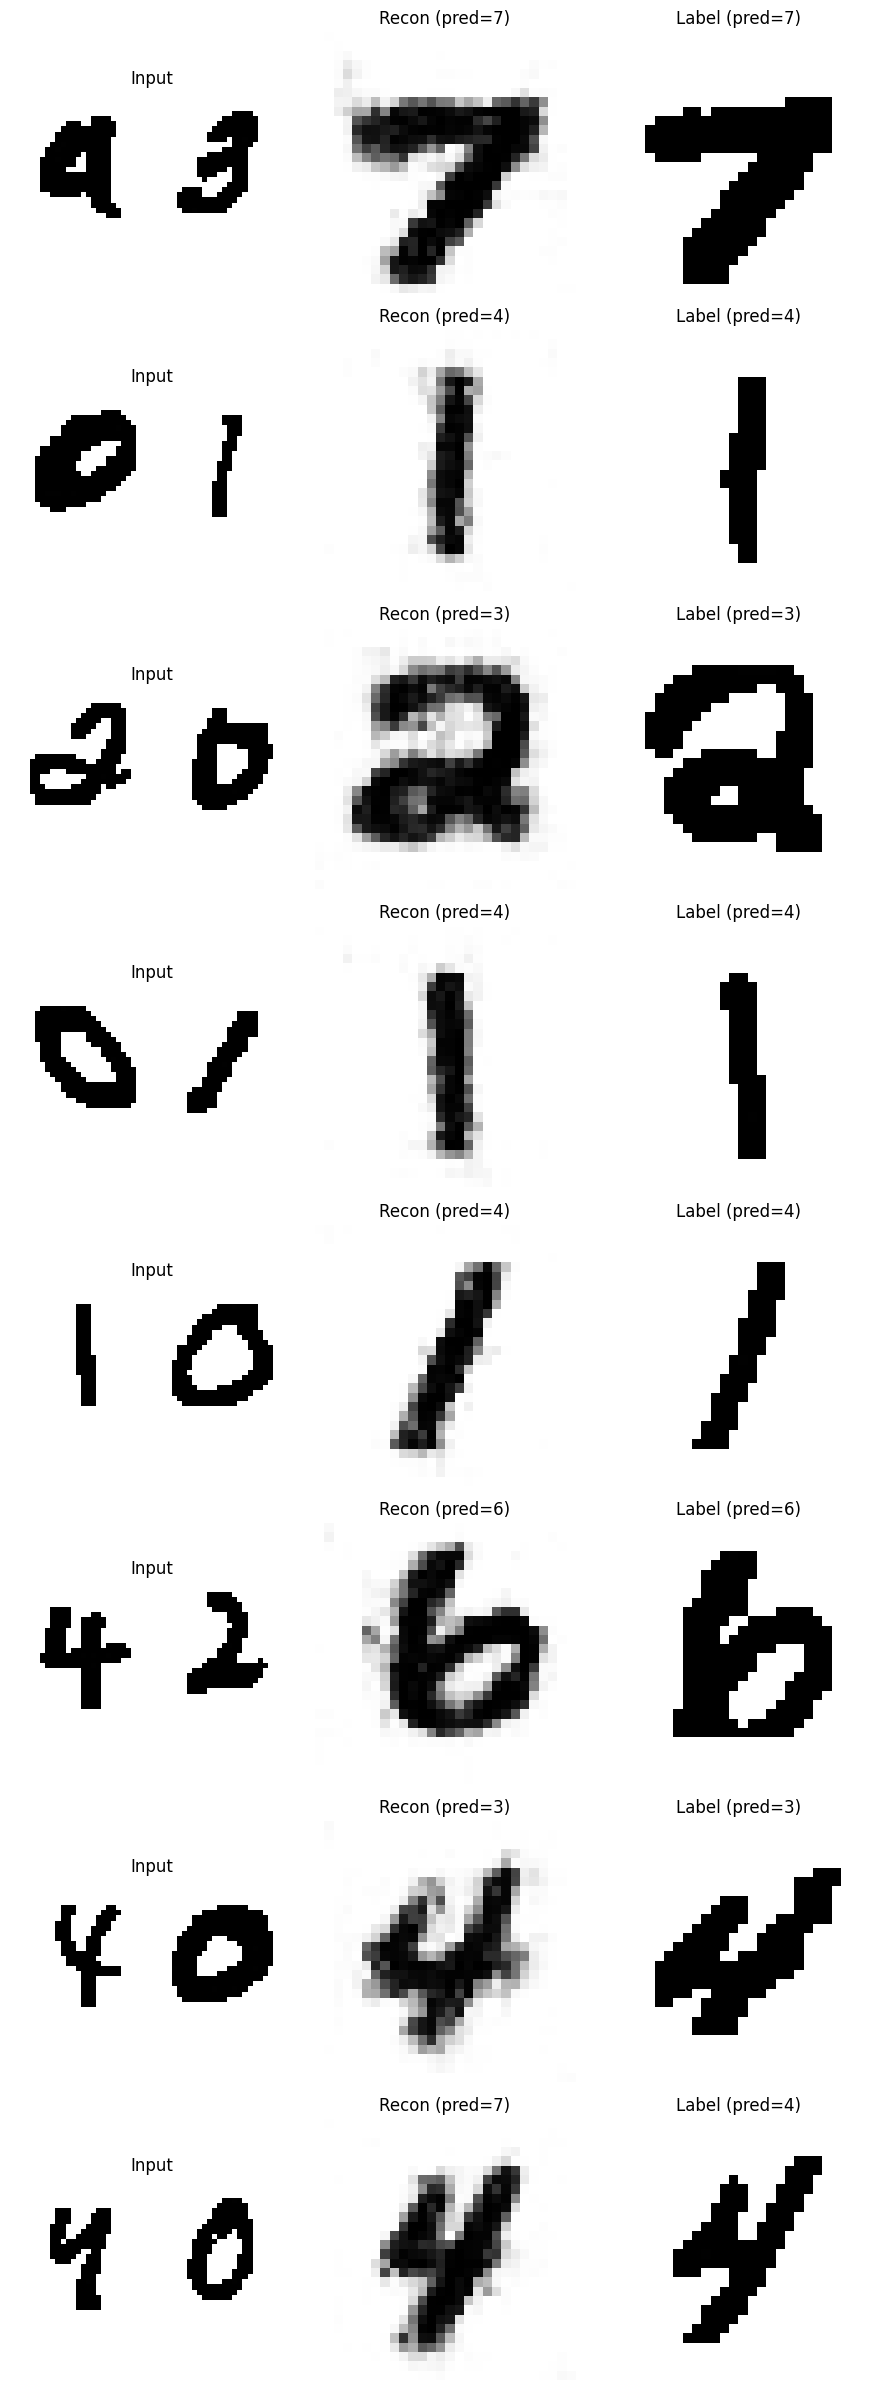

In [10]:
import matplotlib.pyplot as plt
import torch

@torch.no_grad()
def show_batch_effect(loader, vqvae, cnn, device, max_vis=8):
    # 确保两个模型都在正确设备上
    vqvae = vqvae.to(device).eval()
    cnn = cnn.to(device).eval()  # 这是关键修复
    
    imgs, labs = next(iter(loader))
    imgs, labs = imgs.to(device), labs.to(device)

    recon, _ = vqvae(imgs)
    
    
    # 显示部分保持不变
    imgs_d = (imgs * 0.5 + 0.5).clamp(0,1).cpu()
    labs_d = (labs * 0.5 + 0.5).clamp(0,1).cpu()
    recon_d = (recon * 0.5 + 0.5).clamp(0,1).cpu()

    # 现在cnn和recon都在同一个设备上
    pred_recon = cnn(recon).argmax(1).cpu().numpy()
    pred_gt = cnn(labs).argmax(1).cpu().numpy()

    B = min(max_vis, imgs.size(0))
    plt.figure(figsize=(9, 3*B))
    for i in range(B):
        for c, tensor in enumerate([imgs_d, recon_d, labs_d]):
            plt.subplot(B, 3, i*3 + c + 1)
            plt.imshow(tensor[i, 0], cmap='gray')
            plt.axis('off')
            plt.title(['Input', 
                      f'Recon (pred={pred_recon[i]})',
                      f'Label (pred={pred_gt[i]})'][c])
    plt.tight_layout()
    plt.show()

# ---------- 调用 ----------
show_batch_effect(data_loader, model, verify_model, device,
                  max_vis=8)

### all dataset

In [32]:
import torch
from tqdm import tqdm

def calculate_reconstruction_consistency(vqvae, cnn, data_loader, device):
    """
    计算VQ-VAE重建图像和原始标签图像在CNN预测结果上的一致性比例
    
    参数:
        vqvae: 训练好的VQ-VAE模型
        cnn: 训练好的CNN分类模型
        data_loader: 数据加载器
        device: 计算设备
    
    返回:
        consistency_rate: 预测一致的比例(0-1)
        total_samples: 总样本数
        matching_cases: 预测一致的样本数
    """
    vqvae.eval()
    cnn.eval()
    
    matching_cases = 0
    total_samples = 0
    
    with torch.no_grad():
        for imgs, labs in tqdm(data_loader, desc="Evaluating consistency"):
            imgs = imgs.to(device)
            labs = labs.to(device)
            
            # 生成重建图像
            recon, _ = vqvae(imgs)
            
            # 将重建图像和标签图像都归一化到[-1,1]范围(如果CNN是在这个范围训练的)
            recon_normalized = recon  # 假设VQ-VAE输出已经是[-1,1]
            labs_normalized = labs    # 假设标签图像已经是[-1,1]
            
            # CNN预测
            pred_recon = cnn(recon_normalized).argmax(dim=1)
            pred_labs = cnn(labs_normalized).argmax(dim=1)
            
            # 统计一致的数量
            matching_cases += (pred_recon == pred_labs).sum().item()
            total_samples += imgs.size(0)
    
    consistency_rate = matching_cases / total_samples if total_samples > 0 else 0
    
    print(f"\nConsistency Report:")
    print(f"Total samples evaluated: {total_samples}")
    print(f"Matching predictions: {matching_cases}")
    print(f"Consistency rate: {consistency_rate:.4f} ({consistency_rate*100:.2f}%)")
    
    return consistency_rate, total_samples, matching_cases


# 使用示例
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载模型和数据加载器
# vqvae = ... (你的VQ-VAE模型)
# cnn = ... (你的CNN分类模型)
# data_loader = ... (你的数据加载器)

# 计算一致性
consistency_rate, total, matching = calculate_reconstruction_consistency(
    model, verify_model, data_loader, device
)

Evaluating consistency:   0%|          | 0/625 [00:00<?, ?it/s]

Evaluating consistency: 100%|██████████| 625/625 [00:04<00:00, 133.68it/s]


Consistency Report:
Total samples evaluated: 10000
Matching predictions: 5990
Consistency rate: 0.5990 (59.90%)
